<a href="https://colab.research.google.com/github/EduardoPalma/ClusteringFood/blob/main/clustering_de_alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informacion nutricional de diversos alimentos, obtenidos de FoodDataCentral, proyecto personal orientado a la realizacion de clustering mediante  K-means, para ver similitudes de alimentos sin conocer.

In [1]:
import zipfile
import json
import pandas as pd

In [2]:
file = "/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2018-04.zip"

with zipfile.ZipFile(file, 'r') as zip_ref:
    directorio_destino = '/content/drive/MyDrive/alimentos/'
    zip_ref.extractall(directorio_destino)

In [3]:
with open('/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2021-10-28.json', 'r') as file:
    datos_json = json.load(file)

In [4]:
data_alimentos = datos_json['SRLegacyFoods']
print(len(data_alimentos))

7793


In [5]:
nombres_unicos_nutri = set()

for elemento in data_alimentos:
    lista_nutrientes = elemento['foodNutrients']

    for diccionario in lista_nutrientes:
      nombre = diccionario['nutrient']['name']
      nombres_unicos_nutri.add(nombre)

nombres_nutrientes = list(nombres_unicos_nutri)
print(nombres_nutrientes)

['Carotene, alpha', 'Fiber, total dietary', 'Vitamin K (Dihydrophylloquinone)', 'Cryptoxanthin, beta', 'PUFA 18:3i', 'SFA 12:0', 'Tocotrienol, gamma', 'Folate, total', 'Thiamin', 'MUFA 14:1', 'Fluoride, F', 'Hydroxyproline', 'PUFA 20:3 n-6', 'Energy', 'Manganese, Mn', 'Leucine', 'SFA 20:0', 'Folate, food', 'Tocopherol, delta', 'Vitamin K (Menaquinone-4)', 'PUFA 21:5', 'PUFA 2:4 n-6', 'Vitamin D2 (ergocalciferol)', 'Carotene, beta', 'SFA 16:0', 'Fatty acids, total trans', 'Vitamin B-6', 'PUFA 22:6 n-3 (DHA)', 'Cystine', 'Vitamin B-12, added', 'Tocotrienol, beta', 'Fatty acids, total trans-monoenoic', 'PUFA 22:4', 'Carbohydrate, by difference', 'Alcohol, ethyl', 'Copper, Cu', 'PUFA 18:2 CLAs', 'Vitamin A, IU', 'PUFA 20:2 n-6 c,c', 'MUFA 22:1', 'Water', 'Iron, Fe', 'Vitamin E (alpha-tocopherol)', 'Phytosterols', 'MUFA 15:1', 'Riboflavin', 'Arginine', 'TFA 22:1 t', 'Vitamin B-12', 'MUFA 17:1', 'Glycine', 'Zinc, Zn', 'Protein', 'PUFA 20:3', 'Valine', 'Tocopherol, gamma', 'PUFA 20:4', 'Sugar

In [6]:
nombres_nutrientes.append("description")
df_alimentos_ = pd.DataFrame(columns=nombres_nutrientes)
print(df_alimentos_)

Empty DataFrame
Columns: [Carotene, alpha, Fiber, total dietary, Vitamin K (Dihydrophylloquinone), Cryptoxanthin, beta, PUFA 18:3i, SFA 12:0, Tocotrienol, gamma, Folate, total, Thiamin, MUFA 14:1, Fluoride, F, Hydroxyproline, PUFA 20:3 n-6, Energy, Manganese, Mn, Leucine, SFA 20:0, Folate, food, Tocopherol, delta, Vitamin K (Menaquinone-4), PUFA 21:5, PUFA 2:4 n-6, Vitamin D2 (ergocalciferol), Carotene, beta, SFA 16:0, Fatty acids, total trans, Vitamin B-6, PUFA 22:6 n-3 (DHA), Cystine, Vitamin B-12, added, Tocotrienol, beta, Fatty acids, total trans-monoenoic, PUFA 22:4, Carbohydrate, by difference, Alcohol, ethyl, Copper, Cu, PUFA 18:2 CLAs, Vitamin A, IU, PUFA 20:2 n-6 c,c, MUFA 22:1, Water, Iron, Fe, Vitamin E (alpha-tocopherol), Phytosterols, MUFA 15:1, Riboflavin, Arginine, TFA 22:1 t, Vitamin B-12, MUFA 17:1, Glycine, Zinc, Zn, Protein, PUFA 20:3, Valine, Tocopherol, gamma, PUFA 20:4, Sugars, total including NLEA, Calcium, Ca, Vitamin K (phylloquinone), Sucrose, Vitamin C, total

In [7]:
def valores_vacios(df_nuevo):
  for nombre in nombres_nutrientes:
    if nombre not in df_nuevo:
      df_nuevo[nombre] = 0


In [8]:
for elemento in data_alimentos:
  nombre_alimento = elemento['description']
  lista_nutrientes = elemento['foodNutrients']

  df_nuevo = {}
  df_nuevo['description'] = nombre_alimento


  for nutrientes in lista_nutrientes:
      nombre = nutrientes['nutrient']['name']
      cantidad = nutrientes['amount']
      df_nuevo[nombre] = cantidad

  valores_vacios(df_nuevo)
  df_nuevo_concat = pd.DataFrame(df_nuevo, index=[1])
  df_alimentos_ = pd.concat([df_alimentos_, df_nuevo_concat], ignore_index=True)

In [9]:
print(len(df_alimentos_))

7793


In [10]:
df_alimentos = df_alimentos_.drop(columns=['description'])
df_alimentos = df_alimentos.astype(float)
df_alimentos.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 148 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    Carotene, alpha                           float64
 1    Fiber, total dietary                      float64
 2    Vitamin K (Dihydrophylloquinone)          float64
 3    Cryptoxanthin, beta                       float64
 4    PUFA 18:3i                                float64
 5    SFA 12:0                                  float64
 6    Tocotrienol, gamma                        float64
 7    Folate, total                             float64
 8    Thiamin                                   float64
 9    MUFA 14:1                                 float64
 10   Fluoride, F                               float64
 11   Hydroxyproline                            float64
 12   PUFA 20:3 n-6                             float64
 13   Energy                                    floa

In [11]:
df_alimentos.head()

,"Carotene, alpha","Fiber, total dietary",Vitamin K (Dihydrophylloquinone),"Cryptoxanthin, beta",PUFA 18:3i,SFA 12:0,"Tocotrienol, gamma","Folate, total",Thiamin,MUFA 14:1,...,Histidine,Betaine,SFA 13:0,SFA 24:0,MUFA 16:1,PUFA 18:4,PUFA 18:2,Tryptophan,Methionine,Starch
0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
1,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.000,0.0,...,0.000,0.0,0.0,0.0,0.000,0.000,0.841,0.000,0.000,0.0
4,0.0,2.2,17.9,2.0,0.0,0.0,0.0,63.0,0.499,0.0,...,0.143,0.0,0.0,0.0,0.022,0.002,1.410,0.074,0.133,35.5


In [12]:
df_alimentos.describe()

,"Carotene, alpha","Fiber, total dietary",Vitamin K (Dihydrophylloquinone),"Cryptoxanthin, beta",PUFA 18:3i,SFA 12:0,"Tocotrienol, gamma","Folate, total",Thiamin,MUFA 14:1,...,Histidine,Betaine,SFA 13:0,SFA 24:0,MUFA 16:1,PUFA 18:4,PUFA 18:2,Tryptophan,Methionine,Starch
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,...,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000
mean,21.684845,1.836392,0.315976,7.408315,0.001846,0.206165,0.018322,37.585654,0.179074,0.010189,...,0.302931,3.402053,0.000024,0.003664,0.194735,0.003883,1.680241,0.106434,0.242953,2.533579
std,270.850829,4.183677,3.861200,130.785762,0.034274,2.025380,0.182237,115.515014,0.431404,0.040395,...,0.376056,21.372554,0.001036,0.031879,0.583493,0.067433,4.636031,0.130510,0.303891,9.439905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,8.000000,0.073000,0.000000,...,0.092000,0.000000,0.000000,0.000000,0.032000,0.000000,0.331000,0.043000,0.071000,0.000000
75%,0.000000,2.100000,0.000000,0.000000,0.000000,0.015000,0.000000,29.000000,0.180000,0.000000,...,0.607000,0.100000,0.000000,0.000000,0.214000,0.000000,1.280000,0.205000,0.521000,0.000000
max,14300.000000,79.000000,165.000000,6250.000000,1.300000,53.400000,4.790000,3790.000000,23.400000,1.430000,...,3.000000,630.000000,0.079000,1.170000,20.300000,3.020000,74.600000,1.600000,3.200000,73.800000


In [13]:
alimentos_normalizados = (df_alimentos - df_alimentos.min())/(df_alimentos.max() - df_alimentos.min())
alimentos_normalizados

,"Carotene, alpha","Fiber, total dietary",Vitamin K (Dihydrophylloquinone),"Cryptoxanthin, beta",PUFA 18:3i,SFA 12:0,"Tocotrienol, gamma","Folate, total",Thiamin,MUFA 14:1,...,Histidine,Betaine,SFA 13:0,SFA 24:0,MUFA 16:1,PUFA 18:4,PUFA 18:2,Tryptophan,Methionine,Starch
0,0.0,0.015190,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.017722,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.010554,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.011273,0.000000,0.000000,0.00000
4,0.0,0.027848,0.108485,0.00032,0.0,0.0,0.0,0.016623,0.021325,0.0,...,0.047667,0.000000,0.0,0.0,0.001084,0.000662,0.018901,0.046250,0.041563,0.48103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.002375,0.001282,0.0,...,0.296000,0.000000,0.0,0.0,0.001970,0.000000,0.002815,0.204375,0.210000,0.00000
7789,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.244333,0.000000,0.0,0.0,0.006404,0.000000,0.002279,0.258750,0.172187,0.00000
7790,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.002375,0.000000,0.0,...,0.321333,0.000000,0.0,0.0,0.008374,0.000000,0.003083,0.340625,0.226562,0.00000
7791,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.001319,0.004701,0.0,...,0.143000,0.000000,0.0,0.0,0.001970,0.000000,0.001340,0.191250,0.172500,0.00000


In [14]:
alimentos_normalizados.describe()

,"Carotene, alpha","Fiber, total dietary",Vitamin K (Dihydrophylloquinone),"Cryptoxanthin, beta",PUFA 18:3i,SFA 12:0,"Tocotrienol, gamma","Folate, total",Thiamin,MUFA 14:1,...,Histidine,Betaine,SFA 13:0,SFA 24:0,MUFA 16:1,PUFA 18:4,PUFA 18:2,Tryptophan,Methionine,Starch
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,...,7793.000000,7793.000000,7793.00000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000
mean,0.001516,0.023245,0.001915,0.001185,0.001420,0.003861,0.003825,0.009917,0.007653,0.007125,...,0.100977,0.005400,0.00030,0.003131,0.009593,0.001286,0.022523,0.066521,0.075923,0.034330
std,0.018941,0.052958,0.023401,0.020926,0.026365,0.037928,0.038045,0.030479,0.018436,0.028248,...,0.125352,0.033925,0.01311,0.027247,0.028743,0.022329,0.062145,0.081569,0.094966,0.127912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000528,0.001282,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000670,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000,0.002111,0.003120,0.000000,...,0.030667,0.000000,0.00000,0.000000,0.001576,0.000000,0.004437,0.026875,0.022187,0.000000
75%,0.000000,0.026582,0.000000,0.000000,0.000000,0.000281,0.000000,0.007652,0.007692,0.000000,...,0.202333,0.000159,0.00000,0.000000,0.010542,0.000000,0.017158,0.128125,0.162812,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clustering de alimentos, agrupacion por valor nutricional

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
clusters = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=300, n_init=4)
  kmeans.fit(alimentos_normalizados)
  clusters.append(kmeans.inertia_)



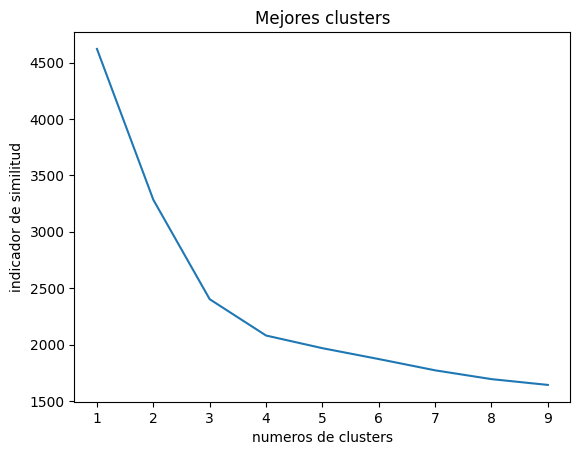

In [17]:
plt.plot(range(1,10), clusters)
plt.title("Mejores clusters")
plt.xlabel("numeros de clusters")
plt.ylabel("indicador de similitud")
plt.show()

# Aplicando el modelo
Numero de cluster a utilizar 4 ultimo indicador de eficiente dentro del modelo

In [18]:
clustering = KMeans(init="k-means++", n_clusters=4, n_init=4)
clustering.fit(alimentos_normalizados)

KMeans(n_clusters=4, n_init=4)

In [19]:
df_alimentos_['kmeans_label'] = clustering.labels_

<ipython-input-19-5053fb6e6088>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_alimentos_['kmeans_label'] = clustering.labels_


In [20]:
df_alimentos_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Columns: 150 entries, Carotene, alpha to kmeans_label
dtypes: float64(12), int32(1), object(137)
memory usage: 8.9+ MB


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_alimentos = pca.fit_transform(alimentos_normalizados)
df_alimentos_component = pd.DataFrame(data = pca_alimentos, columns=["componente 1","componente 2","componente 3"])
df_alimentos_labels = pd.concat([df_alimentos_component, df_alimentos_[['kmeans_label']]], axis=1)

df_alimentos_labels

,componente 1,componente 2,componente 3,kmeans_label
0,-0.438416,0.062455,-0.064849,2
1,-0.524922,0.175132,-0.155262,2
2,-0.639137,0.415253,-0.305503,2
3,-0.426160,-0.006072,-0.149893,0
4,-0.274174,0.158325,-0.145567,2
...,...,...,...,...
7788,0.691548,0.001846,-0.158512,3
7789,0.566428,-0.106015,-0.121080,3
7790,0.793597,0.058847,-0.176499,3
7791,0.352704,-0.206882,-0.056486,3


# Visualizacion de los clusters

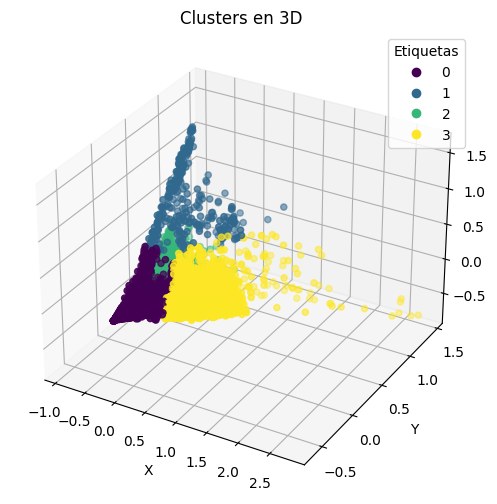

In [25]:
from mpl_toolkits.mplot3d import Axes3D

x = df_alimentos_labels['componente 1']
y = df_alimentos_labels['componente 2']
z = df_alimentos_labels['componente 3']
labels = df_alimentos_labels['kmeans_label']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Clusters en 3D')
ax.legend(*scatter.legend_elements(), title='Etiquetas')

# Mostrar el gráfico
plt.show()

*se realizar nuevamente una visualizacion pero con dimensionalidad 2 para ver el cluster faltante de color morado*

In [27]:
import plotly.express as px

fig = px.scatter_3d(df_alimentos_labels, x='componente 1', y='componente 2', z='componente 3',
                    color='kmeans_label', size_max=15, opacity=0.7, labels={'kmeans_label': 'Etiquetas'},
                    color_continuous_scale='deep')

fig.update_layout(scene=dict(
                    xaxis=dict(title='Componente 1'),
                    yaxis=dict(title='Componente 2'),
                    zaxis=dict(title='Componente 3')
                ))

fig.show()

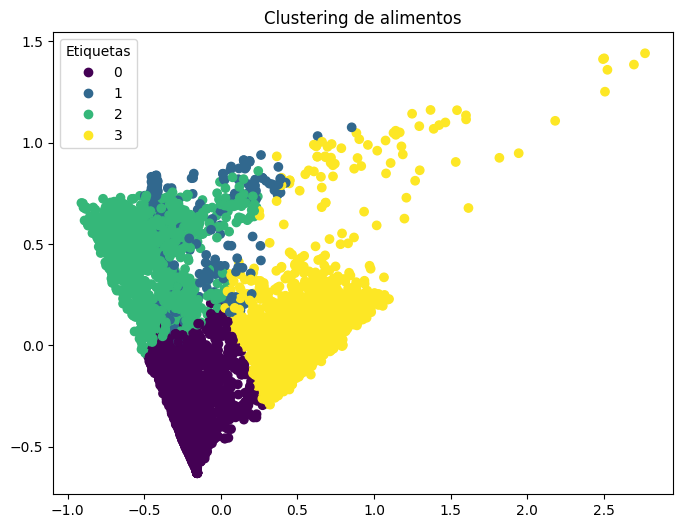

In [23]:
x = df_alimentos_labels['componente 1']
y = df_alimentos_labels['componente 2']
labels = df_alimentos_labels['kmeans_label']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Clustering de alimentos")


scatter = ax.scatter(x=x, y=y, c=labels,cmap='viridis')

ax.legend(*scatter.legend_elements(), title='Etiquetas')

plt.show()

In [ ]:
df_alimentos_labels.to_csv('/content/drive/MyDrive/alimentos/cluster.csv')
df_alimentos_.to_csv('/content/drive/MyDrive/alimentos/data_cluster.csv')